# 차원 축소 

- 과일 사진의 경우는 10000개의 픽셀이 있기 때문에 10000개의 특성이 있음 
- 차원의 저주
    - 일반적인 머신러닝 문제는 수천 ~ 수백만 개의 특성을 가지는 경우도 있음 
    - 특성이 너무 많으면 훈련이 느리게 될 뿐 아니라 좋은 솔루션을 찾기 어렵게 됨 
    - 이러한 문제를 차원의 저주(curse of dimensionality)라고 함 
    
- 차원 축소(dimensionality reduction) * 컬럼줄이는 법 
    - 데이터를 가장 잘 나타내는 일부 특성을 선택하여 데이터 크기를 줄이고 모델의 성능을 향상시키는 방법 
    - 예) 이미지 경계면의 배경 부분 제거, 서로 인접한 픽셀들을 결합 등 

## 주성분 분석(principal component analysis)

- 데이터에 있는 분산이 가장 큰 방향을 찾는 것
    - 분산 : 데이터가 퍼져 있는 정도 
    
<img src = "./image/pca1.gif">

- 위 그림의 데이터에서는 오른쪽 위를 향하는 분산이 가장 큼 
- 원본 데이터를 가장 잘 설명하는 방향이 주성분(principal component)
    - 주성분은 데이터가 가진 특성을 가장 잘 나타내기 때문에 주성분에 데이터를 투영하면 정보의 손실을 줄이면서 차원을 축소할 수 있음 

<img src = "./image/pca2.png">

- 누군가에게 설명하기 위해서는 2차원이(PCA) 가장 편리함 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

In [2]:
fruits = np.load('./data/fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100 * 100)

In [3]:
# n_components : 주성분의 개수
pca = PCA(n_components= 50)
pca.fit(fruits_2d)

PCA(n_components=50)

- 1만개의 컬럼에서 50개로 줄임
    - 많이 줄이는것도 아니고 PCA 로 쓰면 보통은 50개로도 안씀, 더 적게씀 

In [4]:
# pca가 찾은 주성분 확인
pca.components_.shape

(50, 10000)

In [5]:
# 각 클러스터가 어떤 데이터를 나타내는지 출력하는 (시각화 해줄) 함수
def draw_fruits(arr, ratio = 1):
    n = len(arr) # 샘플 수
    
    # 한 줄에 10개씩 이미지를 그릴 때, 몇 개 행이 필요할 지 행 개수 계산
    rows = int(np.ceil(n / 10))
    cols = 10
    
    fig, axs = plt.subplots(rows, cols, figsize = (cols * ratio, rows * ratio),
                            squeeze = False) # squeeze는 matplotlib 에서 수치 보정해주는 기능 = False, 우리의 데이터 그대로 보기 위해 
    
    # 파이썬 처음 별그리기 (별에서 사과이미지로.. )
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i * 10 + j], cmap = 'gray_r')
            axs[i,j].axis("off")
            
    plt.show()

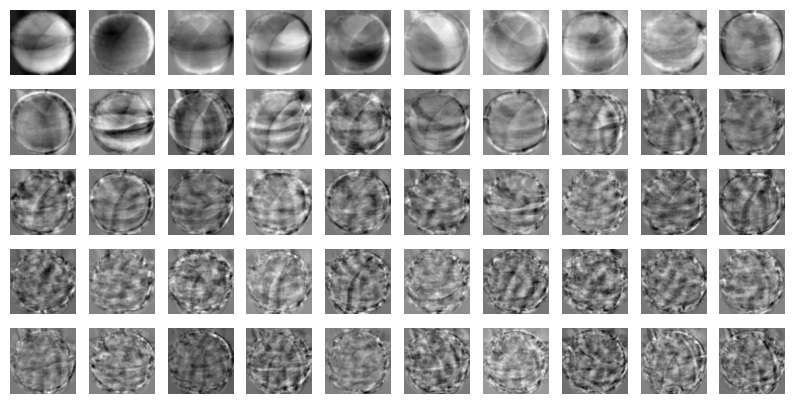

In [6]:
# 우리의 주성분들 
draw_fruits(pca.components_.reshape(-1, 100, 100))

- 특징 : 가운데가 조금 어둡고 , 2번째 (주성분) 바깥부분이 살짝 어둡게 강한 특징